# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

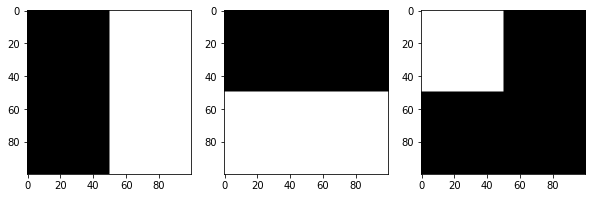

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


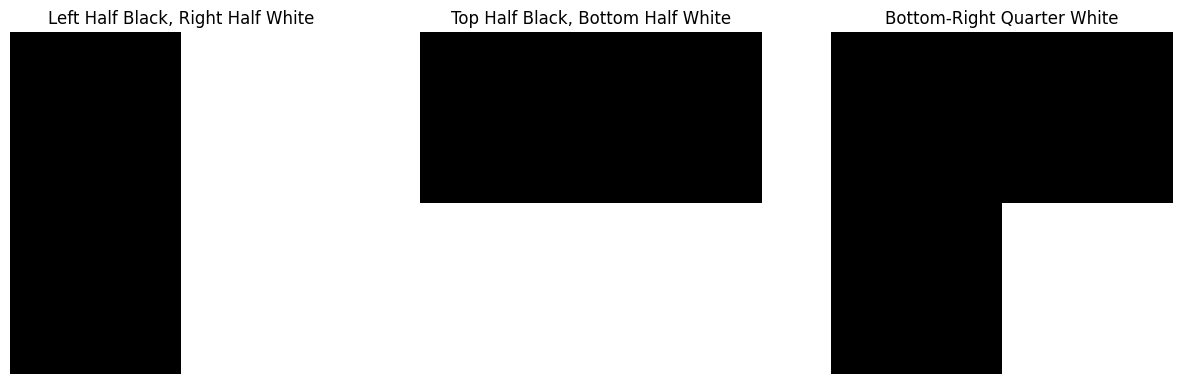

In [2]:
# solution
import matplotlib.pyplot as plt
import numpy as np

# Create three 100x100 images
img1 = np.zeros((100, 100), dtype=np.uint8)
img2 = np.zeros((100, 100), dtype=np.uint8)
img3 = np.zeros((100, 100), dtype=np.uint8)

# For img1: left half black, right half white
img1[:, :50] = 0  # Left half black
img1[:, 50:] = 255  # Right half white

# For img2: top half black, bottom half white
img2[:50, :] = 0  # Top half black
img2[50:, :] = 255  # Bottom half white

# For img3: bottom-right quarter white, rest black
img3[50:, 50:] = 255  # Bottom-right quarter white

# Plot the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Left Half Black, Right Half White')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Top Half Black, Bottom Half White')
axes[1].axis('off')

axes[2].imshow(img3, cmap='gray')
axes[2].set_title('Bottom-Right Quarter White')
axes[2].axis('off')

plt.show()


*   Use the above three images to create the following image

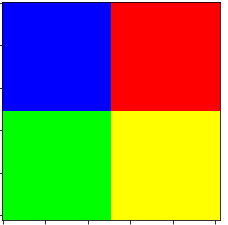
*Hint: Remember channels and color spaces*

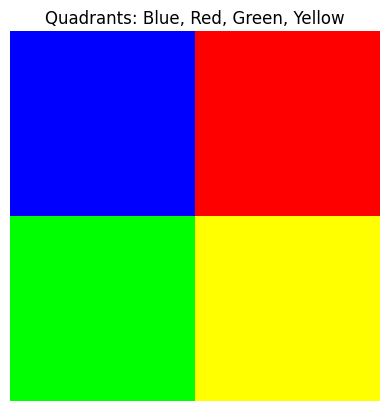

In [6]:
# Create a 100x100 image with four quadrants: 
# top-left blue, top-right red, bottom-left green, bottom-right yellow

# Create an empty 100x100 image with 3 color channels
image = np.zeros((100, 100, 3), dtype=np.uint8)

# Set the colors for each quadrant
# Top-left (Blue)
image[:50, :50, 2] = 255  # Blue channel

# Top-right (Red)
image[:50, 50:, 0] = 255  # Red channel

# Bottom-left (Green)
image[50:, :50, 1] = 255  # Green channel

# Bottom-right (Yellow)
image[50:, 50:, 0] = 255  # Red channel
image[50:, 50:, 1] = 255  # Green channel

# Plot the image
plt.imshow(image)
plt.title('Quadrants: Blue, Red, Green, Yellow')
plt.axis('off')
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

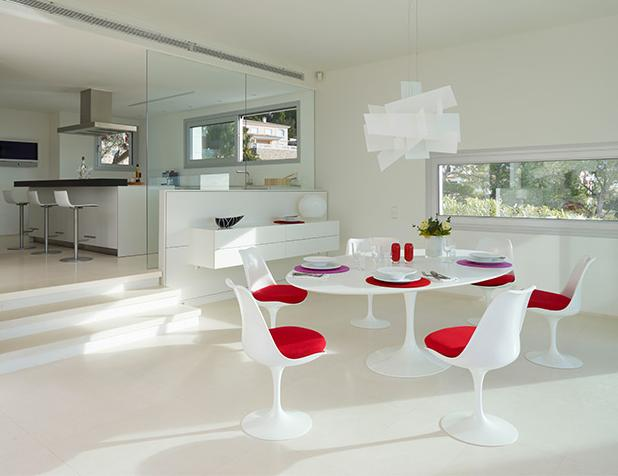

*   Extract individual channels and plot them using matplotlib subplot.



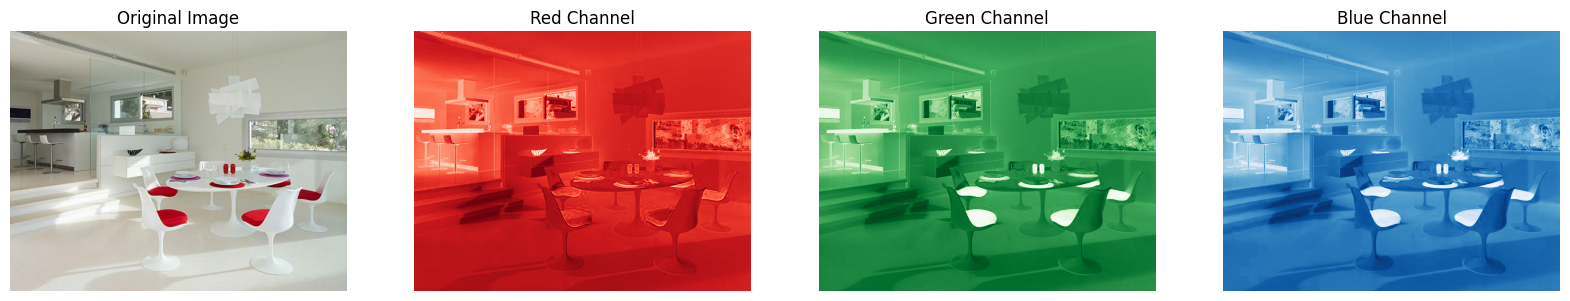

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read the image (assuming it's in the current directory)
image = cv2.imread('images/sillas.jpg')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the channels
r_channel = image_rgb[:, :, 0]
g_channel = image_rgb[:, :, 1]
b_channel = image_rgb[:, :, 2]

# Plot the original image and the individual channels
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Original Image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Red Channel
axs[1].imshow(r_channel, cmap='Reds')
axs[1].set_title('Red Channel')
axs[1].axis('off')

# Green Channel
axs[2].imshow(g_channel, cmap='Greens')
axs[2].set_title('Green Channel')
axs[2].axis('off')

# Blue Channel
axs[3].imshow(b_channel, cmap='Blues')
axs[3].set_title('Blue Channel')
axs[3].axis('off')

plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

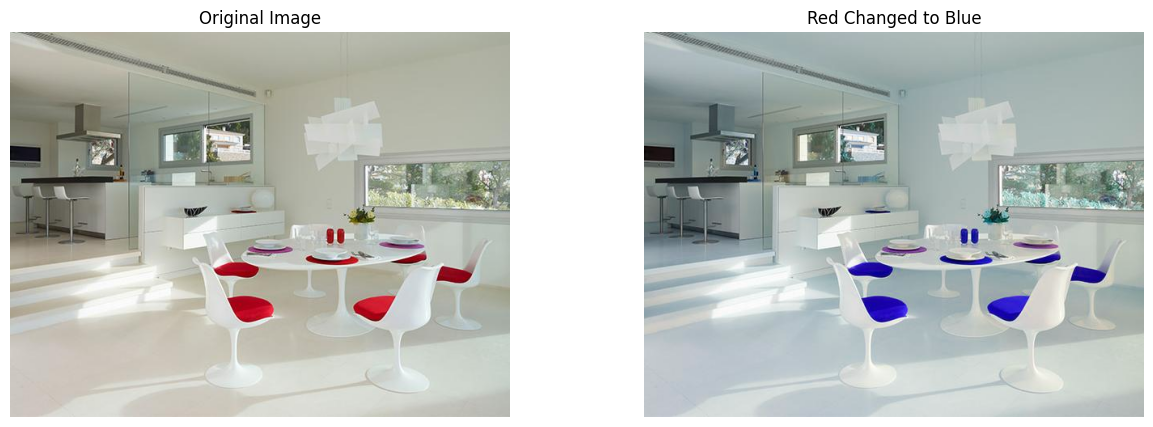

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read the image (assuming it's in the current directory)
image = cv2.imread('images/sillas.jpg')

# Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a copy of the image to modify
modified_image = image_rgb.copy()

# Swap red and blue channels
modified_image[:, :, 0], modified_image[:, :, 2] = image_rgb[:, :, 2], image_rgb[:, :, 0]

# Plot the original and modified images side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Original Image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Modified Image (Red changed to Blue)
axs[1].imshow(modified_image)
axs[1].set_title('Red Changed to Blue')
axs[1].axis('off')

plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

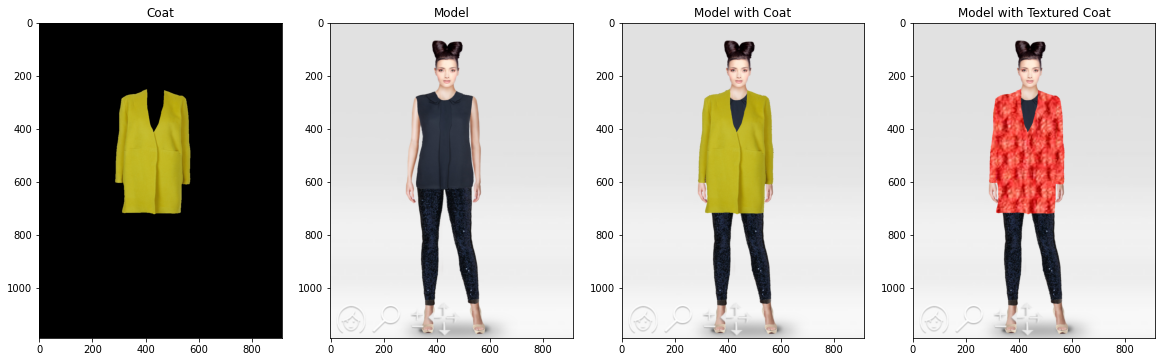

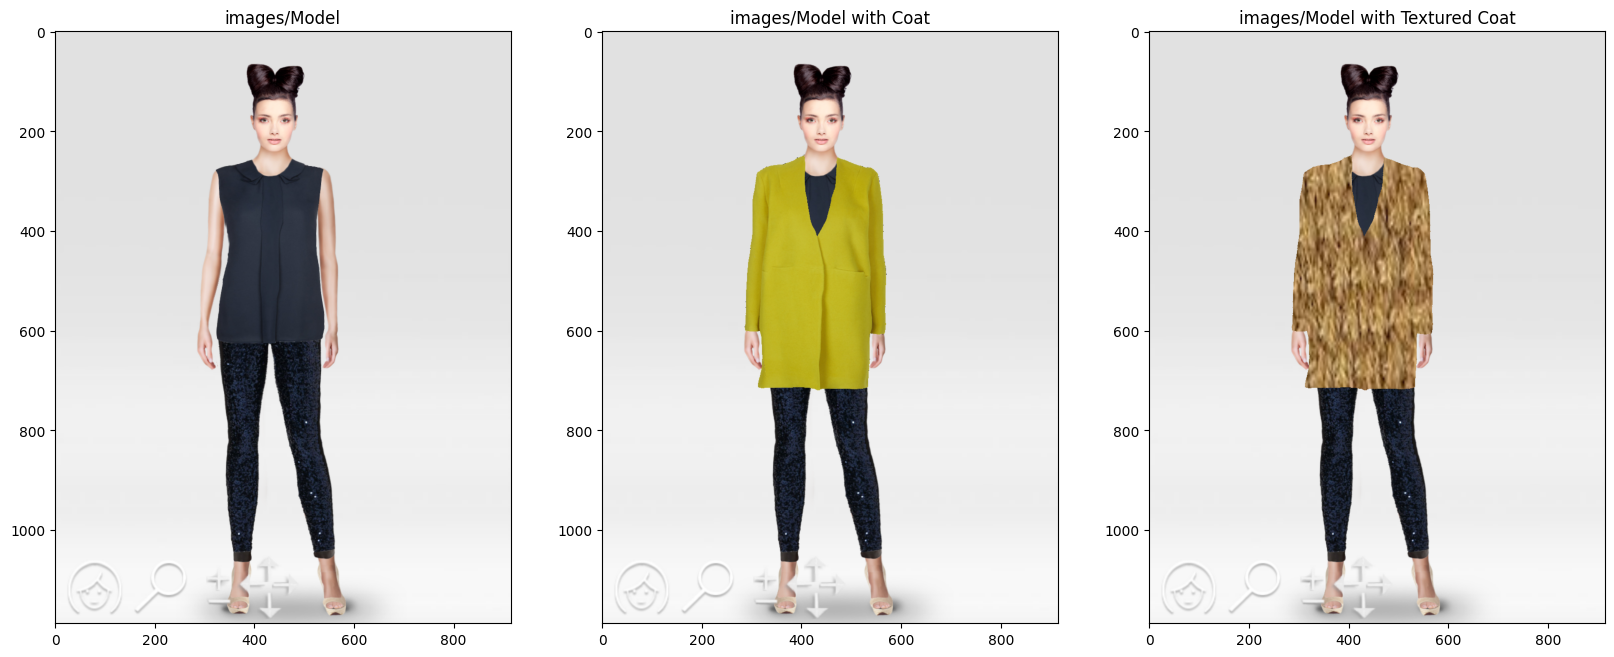

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the model and coat images
model = cv2.imread('images/model.png')
coat = cv2.imread('images/coat.png')

# Resize the coat to match the model's size if needed (Optional)
# coat = cv2.resize(coat, (model.shape[1], model.shape[0]))

# Step 2: Create a mask from the coat image
# Assuming the coat background is black (0,0,0), we create a mask where the coat is
gray_coat = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_coat, 1, 255, cv2.THRESH_BINARY)

# Step 3: Extract the coat region and place it on the model image
mask_inv = cv2.bitwise_not(mask)

# Make the coat region on the model image black
model_bg = cv2.bitwise_and(model, model, mask=mask_inv)

# Extract the coat region from the coat image
coat_fg = cv2.bitwise_and(coat, coat, mask=mask)

# Combine the two to make the model wear the coat
model_with_coat = cv2.add(model_bg, coat_fg)

# Step 4: Load the texture image
texture = cv2.imread('images/texture.png')

# Resize the texture to match the size of the coat if necessary
texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

# Apply the texture on the coat using the same mask
texture_fg = cv2.bitwise_and(texture_resized, texture_resized, mask=mask)

# Combine the texture with the model image
model_with_textured_coat = cv2.add(model_bg, texture_fg)

# Step 5: Display the images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Show the original model
axs[0].imshow(cv2.cvtColor(model, cv2.COLOR_BGR2RGB))
axs[0].set_title('images/Model')

# Show the model with coat
axs[1].imshow(cv2.cvtColor(model_with_coat, cv2.COLOR_BGR2RGB))
axs[1].set_title('images/Model with Coat')

# Show the model with textured coat
axs[2].imshow(cv2.cvtColor(model_with_textured_coat, cv2.COLOR_BGR2RGB))
axs[2].set_title('images/Model with Textured Coat')

plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




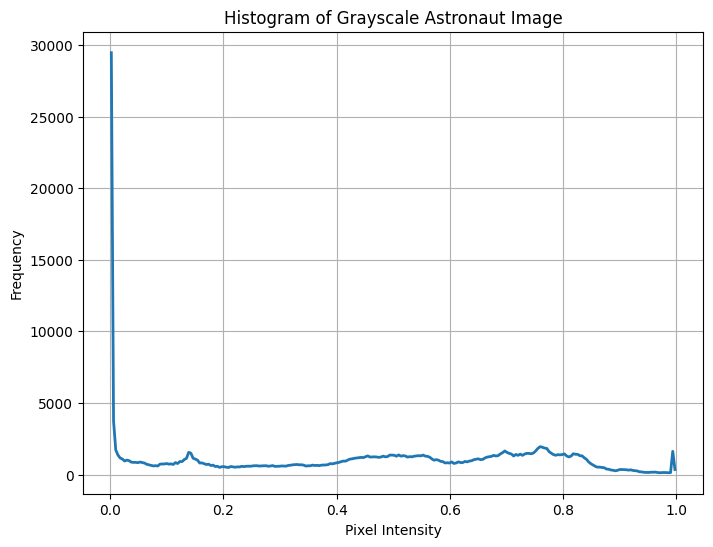

In [13]:
# Let's first import the required libraries for the task
from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Step 1: Load the astronaut image from the skimage data module
astronaut = data.astronaut()

# Step 2: Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut)

# Step 3: Compute the histogram of the grayscale image
hist, bin_centers = exposure.histogram(astronaut_gray)

# Step 4: Plot the histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, hist, lw=2)
plt.title('Histogram of Grayscale Astronaut Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

In [16]:
# Adjust the bar plot by using the first 8 bin edges for plotting with 8 bins
plt.figure(figsize=(8, 6))

# Using the first 8 bin edges and their corresponding histogram values
plt.bar(bin_edges_8_bins[:-1], hist_8_bins, width=np.diff(bin_edges_8_bins), align='edge', edgecolor='black')

plt.title('Histogram of Grayscale Astronaut Image with 8 Bins')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



NameError: name 'bin_edges_8_bins' is not defined

<Figure size 800x600 with 0 Axes>



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


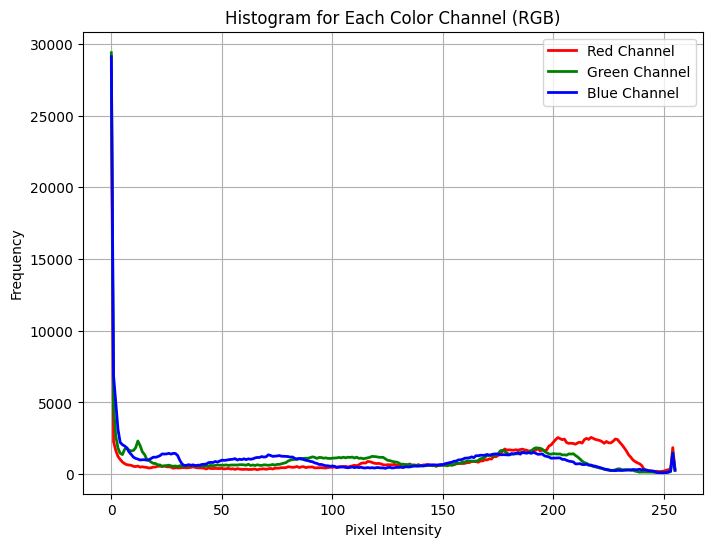

In [14]:
# Let's compute the histograms for each channel (red, green, blue) of the astronaut image
# and plot them together on a single plot.

# Step 1: Compute the histograms for each color channel
r_hist, r_bin_centers = exposure.histogram(astronaut[:, :, 0], nbins=256)
g_hist, g_bin_centers = exposure.histogram(astronaut[:, :, 1], nbins=256)
b_hist, b_bin_centers = exposure.histogram(astronaut[:, :, 2], nbins=256)

# Step 2: Plot the histograms for each channel
plt.figure(figsize=(8, 6))

plt.plot(r_bin_centers, r_hist, color='red', lw=2, label='Red Channel')
plt.plot(g_bin_centers, g_hist, color='green', lw=2, label='Green Channel')
plt.plot(b_bin_centers, b_hist, color='blue', lw=2, label='Blue Channel')

plt.title('Histogram for Each Color Channel (RGB)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



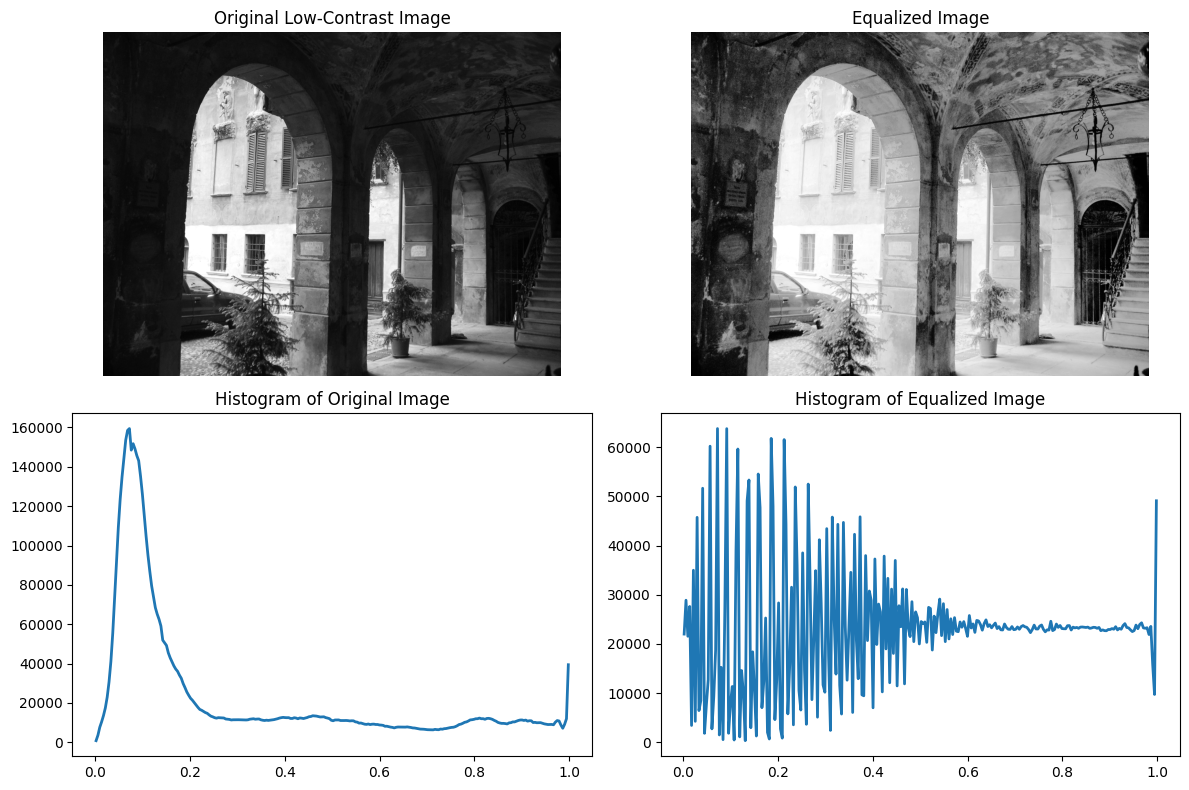

In [15]:
from skimage import io, exposure

# Step 1: Load the image (assuming the file name is 'aquatermi_lowcontrast.jpg')
# As I can't access local files, let's simulate with an equivalent low contrast image
image_path = 'images/aquatermi_lowcontrast.jpg'
low_contrast_image = io.imread(image_path, as_gray=True)

# Step 2: Compute the histogram of the low-contrast image
hist_orig, bin_centers_orig = exposure.histogram(low_contrast_image)

# Step 3: Perform histogram equalization to enhance contrast
equalized_image = exposure.equalize_hist(low_contrast_image)

# Step 4: Compute the histogram of the equalized image
hist_eq, bin_centers_eq = exposure.histogram(equalized_image)

# Step 5: Display both the original and equalized images along with their histograms in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image and histogram
axes[0, 0].imshow(low_contrast_image, cmap='gray')
axes[0, 0].set_title('Original Low-Contrast Image')
axes[0, 0].axis('off')
axes[1, 0].plot(bin_centers_orig, hist_orig, lw=2)
axes[1, 0].set_title('Histogram of Original Image')

# Equalized image and histogram
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Equalized Image')
axes[0, 1].axis('off')
axes[1, 1].plot(bin_centers_eq, hist_eq, lw=2)
axes[1, 1].set_title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



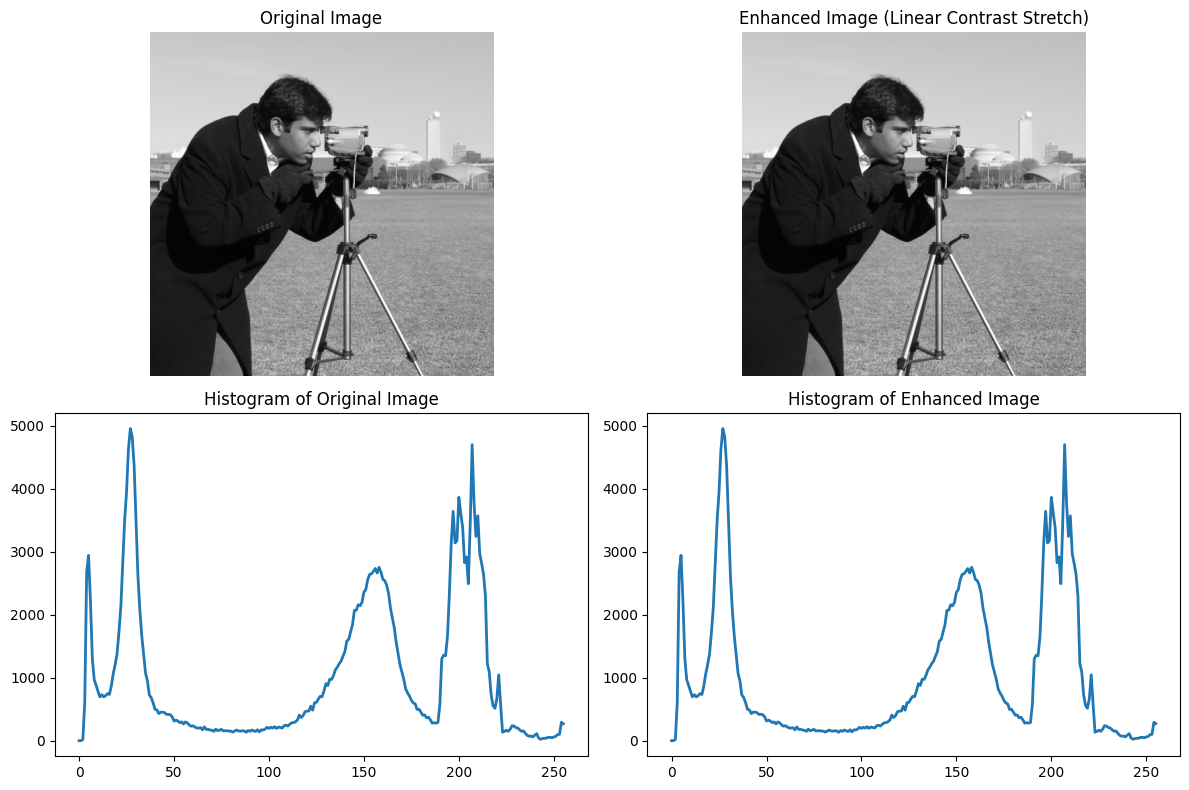

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, data

def linear_contrast_stretch(image, bin_count=256):
    """
    Function to apply linear contrast stretch to an image.
    
    Parameters:
    image (2D array): Grayscale input image
    bin_count (int): Number of bins for histogram
    
    Returns:
    enhanced_image (2D array): Image after contrast stretch
    """
    # Calculate the minimum and maximum pixel intensities
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Apply the linear contrast stretch transformation
    enhanced_image = (image - min_val) / (max_val - min_val) * 255
    enhanced_image = enhanced_image.astype(np.uint8)
    
    return enhanced_image

# Load a sample grayscale image
image = data.camera()

# Apply linear contrast stretch
enhanced_image = linear_contrast_stretch(image)

# Compute histograms
orig_hist, orig_bin_centers = exposure.histogram(image)
enhanced_hist, enhanced_bin_centers = exposure.histogram(enhanced_image)

# Plot original and enhanced images along with histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original image and histogram
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[1, 0].plot(orig_bin_centers, orig_hist, lw=2)
axes[1, 0].set_title('Histogram of Original Image')

# Enhanced image and histogram
axes[0, 1].imshow(enhanced_image, cmap='gray')
axes[0, 1].set_title('Enhanced Image (Linear Contrast Stretch)')
axes[0, 1].axis('off')

axes[1, 1].plot(enhanced_bin_centers, enhanced_hist, lw=2)
axes[1, 1].set_title('Histogram of Enhanced Image')

plt.tight_layout()
plt.show()



# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




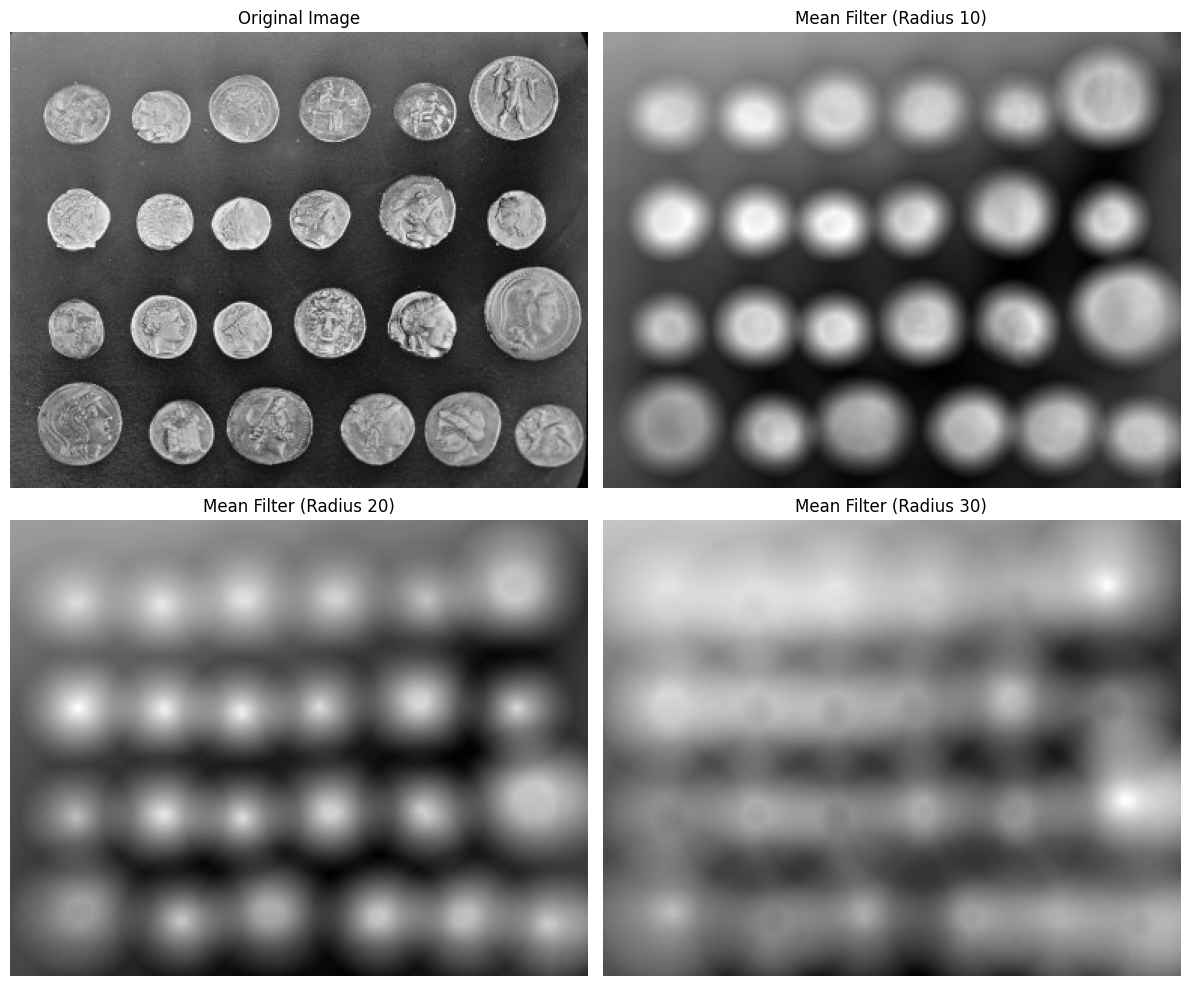

In [19]:
# Correcting the function and using skimage filters with the correct arguments

from skimage.filters import rank
from skimage.morphology import disk
from skimage import img_as_ubyte

# Convert the image to uint8 format, which is required for rank filters
image_uint8 = img_as_ubyte(image)

# Step 3: Apply the mean filter using the disk-shaped structuring element
mean_filtered_20 = rank.mean(image_uint8, disk(20))

# Step 4: Increase the radius by 10 (selem with radius 30) and apply the mean filter
mean_filtered_30 = rank.mean(image_uint8, disk(30))

# Step 5: Reduce the radius by 10 (selem with radius 10) and apply the mean filter
mean_filtered_10 = rank.mean(image_uint8, disk(10))

# Step 6: Visualize all the smoothed images along with the original image
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Mean Filter with selem radius 10
axes[0, 1].imshow(mean_filtered_10, cmap='gray')
axes[0, 1].set_title('Mean Filter (Radius 10)')
axes[0, 1].axis('off')

# Mean Filter with selem radius 20
axes[1, 0].imshow(mean_filtered_20, cmap='gray')
axes[1, 0].set_title('Mean Filter (Radius 20)')
axes[1, 0].axis('off')

# Mean Filter with selem radius 30
axes[1, 1].imshow(mean_filtered_30, cmap='gray')
axes[1, 1].set_title('Mean Filter (Radius 30)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

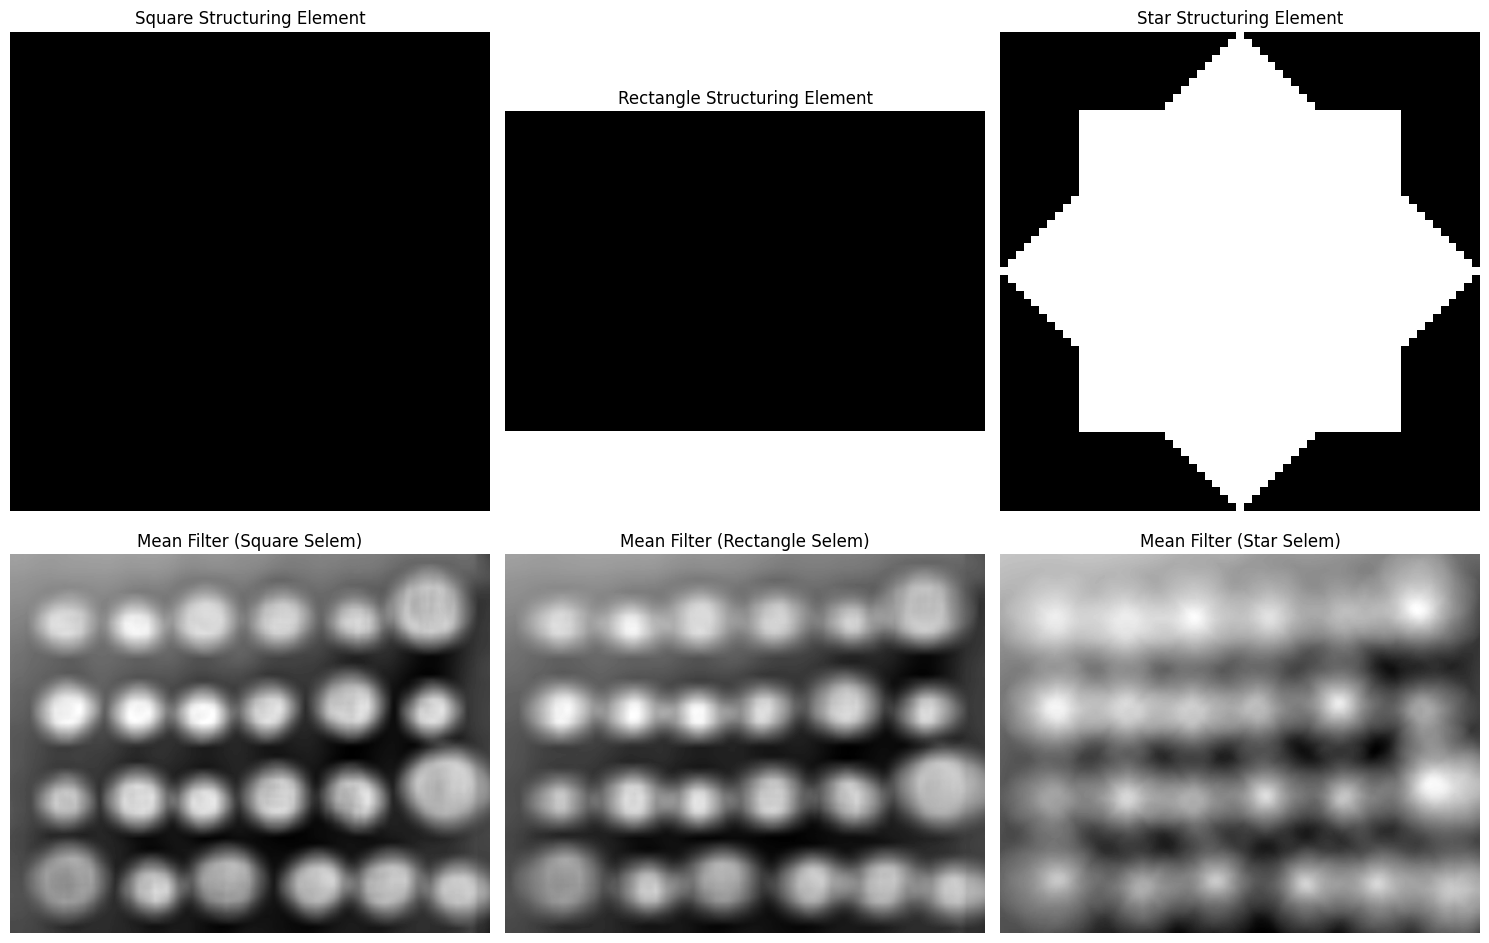

In [22]:
# Correct the usage by directly passing the structuring element without using 'selem'
from skimage.morphology import square, rectangle, star

# Step 1: Define different structuring elements (selems)
selem_square = square(20)
selem_rectangle = rectangle(20, 30)
selem_star = star(20)

# Step 2: Apply the mean filter using each of these structuring elements
mean_filtered_square = rank.mean(image_uint8, selem_square)
mean_filtered_rectangle = rank.mean(image_uint8, selem_rectangle)
mean_filtered_star = rank.mean(image_uint8, selem_star)

# Step 3: Visualize the selem shapes and the corresponding smoothed images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Display the structuring elements
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title('Square Structuring Element')
axes[0, 0].axis('off')

axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title('Rectangle Structuring Element')
axes[0, 1].axis('off')

axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title('Star Structuring Element')
axes[0, 2].axis('off')

# Display the corresponding filtered images
axes[1, 0].imshow(mean_filtered_square, cmap='gray')
axes[1, 0].set_title('Mean Filter (Square Selem)')
axes[1, 0].axis('off')

axes[1, 1].imshow(mean_filtered_rectangle, cmap='gray')
axes[1, 1].set_title('Mean Filter (Rectangle Selem)')
axes[1, 1].axis('off')

axes[1, 2].imshow(mean_filtered_star, cmap='gray')
axes[1, 2].set_title('Mean Filter (Star Selem)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...